In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
df_org = pd.read_csv('./train.csv')
df_org

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,0,97061800,2020-01-01,30,B,11,21,11,10,ZZR1LT6,...,4408909195,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,1,85945189,2020-01-01,40,B,11,21,11,40,SWF9S4X,...,6907221000,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,2,77854751,2020-01-01,20,B,11,21,11,40,X4XT6P8,...,6208221000,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,3,46925060,2020-01-01,40,B,11,21,43,40,K7LCQTZ,...,9403501000,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,4,34131149,2020-01-01,20,B,11,21,11,10,1HMVIVH,...,710807000,VN,VN,27.0,A,B,24000.0,6364800.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37380,37380,78236084,2020-12-31,40,B,11,21,43,40,NZYZ967,...,3926909000,CN,CN,6.5,C,Y,573.0,343.80,1,1
37381,37381,13057608,2020-12-31,20,B,93,31,43,10,RSUWWQ2,...,4016999000,CN,CN,4.8,FCN1,G,1938.0,35077.80,1,1
37382,37382,32316450,2020-12-31,40,B,11,21,11,10,ZOAPZF5,...,8504405090,CN,CN,4.9,CIT,S,50.0,3105.00,0,0
37383,37383,62223974,2020-12-31,20,B,11,21,11,40,09EO87L,...,7204210000,CA,CA,0.0,A,B,20502.0,311630.40,0,0


In [4]:
df_org.shape
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37385 entries, 0 to 37384
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         37385 non-null  int64  
 1   신고번호       37385 non-null  int64  
 2   신고일자       37385 non-null  object 
 3   신고세관부호     37385 non-null  int64  
 4   수입신고구분코드   37385 non-null  object 
 5   수입거래구분코드   37385 non-null  int64  
 6   수입종류코드     37385 non-null  int64  
 7   징수형태코드     37385 non-null  int64  
 8   운송수단유형코드   37385 non-null  int64  
 9   신고인부호      37385 non-null  object 
 10  수입자        37385 non-null  object 
 11  해외거래처부호    33670 non-null  object 
 12  특송업체부호     6714 non-null   object 
 13  HS10단위부호   37385 non-null  int64  
 14  적출국가코드     37385 non-null  object 
 15  원산지국가코드    37385 non-null  object 
 16  관세율        37385 non-null  float64
 17  관세율구분코드    37385 non-null  object 
 18  원산지표시유무코드  37385 non-null  object 
 19  신고중량(KG)   37385 non-null  float64
 20  과세가격원화

In [5]:
# 테스트 1 (8/2)
del df_org['id']
del df_org['신고번호']
del df_org['신고일자']
del df_org['수입자']
del df_org['신고인부호']
del df_org['해외거래처부호']
# 테스트 2 (8/3)
del df_org['수입신고구분코드']
del df_org['수입종류코드']
del df_org['운송수단유형코드']
# 테스트 3 (8/4)
del df_org['수입거래구분코드']
del df_org['특송업체부호']

In [6]:
# discrete_columns = ['신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드', '원산지표시유무코드']

# for var in discrete_columns:
#     df_org[var] = df_org[var].astype(str)

In [7]:
# right skewed 현상 완화
# numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율']

# for var in ['신고중량(KG)', '과세가격원화금액']:
#     df_org[var] = df_org[var].apply(lambda x: np.log1p(x))

In [8]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37385 entries, 0 to 37384
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신고세관부호     37385 non-null  int64  
 1   징수형태코드     37385 non-null  int64  
 2   HS10단위부호   37385 non-null  int64  
 3   적출국가코드     37385 non-null  object 
 4   원산지국가코드    37385 non-null  object 
 5   관세율        37385 non-null  float64
 6   관세율구분코드    37385 non-null  object 
 7   원산지표시유무코드  37385 non-null  object 
 8   신고중량(KG)   37385 non-null  float64
 9   과세가격원화금액   37385 non-null  float64
 10  우범여부       37385 non-null  int64  
 11  핵심적발       37385 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.4+ MB


In [9]:
df_org.sample(5)

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
36674,20,11,3926909000,CN,CN,6.5,C,Y,146.4,87.84,0,0
36712,20,11,8538909000,CN,CN,8.0,A,G,367.0,7340.00,0,0
7420,20,11,4602111000,CN,CN,8.0,A,B,80.0,33280.00,1,1
13652,30,11,9403501000,ID,ID,0.0,C,G,114.3,18322.29,0,0
10394,20,11,3915909000,PL,PL,6.5,C,E,18582.0,0.00,0,0


In [10]:
df_org['우범여부'].value_counts()

0    29271
1     8114
Name: 우범여부, dtype: int64

In [11]:
df_org['핵심적발'].value_counts()

0    29271
1     7720
2      394
Name: 핵심적발, dtype: int64

In [12]:
df_org

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,30,11,4408909195,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,40,11,6907221000,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,20,11,6208221000,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,40,43,9403501000,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,20,11,710807000,VN,VN,27.0,A,B,24000.0,6364800.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37380,40,43,3926909000,CN,CN,6.5,C,Y,573.0,343.80,1,1
37381,20,43,4016999000,CN,CN,4.8,FCN1,G,1938.0,35077.80,1,1
37382,40,11,8504405090,CN,CN,4.9,CIT,S,50.0,3105.00,0,0
37383,20,11,7204210000,CA,CA,0.0,A,B,20502.0,311630.40,0,0


In [13]:
df_test = pd.read_csv('./public.csv')

result = pd.DataFrame()
result['신고번호'] = df_test['신고번호']

# 테스트 1 (8/2)
del df_test['id']
del df_test['신고번호']
del df_test['신고일자']
del df_test['수입자']
del df_test['신고인부호']
del df_test['해외거래처부호']
# 테스트 2 (8/3)
del df_test['수입신고구분코드']
del df_test['수입종류코드']
del df_test['운송수단유형코드']
# 테스트 3 (8/4)
del df_test['수입거래구분코드']
del df_test['특송업체부호']

In [14]:
df_test

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액
0,40,11,7607119000,CN,CN,7.2,FCN1,E,901.2,415092.72
1,20,11,3215909000,HK,CN,0.0,FCN1,E,400.0,30520.00
2,30,14,6505009090,CN,CN,3.2,FCN1,S,339.0,2610.30
3,20,11,6208921000,CN,CN,13.0,A,E,30.0,2478.00
4,16,11,9031809070,US,US,1.3,CIT,B,3.0,86125.20
...,...,...,...,...,...,...,...,...,...,...
8129,40,11,4202922000,CN,CN,4.8,FCN1,S,930.0,55335.00
8130,30,11,3825900000,KR,KR,6.5,C,S,5430.0,28236.00
8131,20,11,9018909090,JP,KR,8.0,A,G,93.5,4703.05
8132,40,18,6203429000,MY,MY,0.0,FAS1,E,717.0,197461.80


In [15]:
from sklearn.preprocessing import LabelEncoder

df_encode = pd.concat([df_test, df_org.iloc[:,:-2]], axis=0)
df_encode = df_encode.drop(['관세율', '신고중량(KG)', '과세가격원화금액'], axis=1)

df_encode

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드
0,40,11,7607119000,CN,CN,FCN1,E
1,20,11,3215909000,HK,CN,FCN1,E
2,30,14,6505009090,CN,CN,FCN1,S
3,20,11,6208921000,CN,CN,A,E
4,16,11,9031809070,US,US,CIT,B
...,...,...,...,...,...,...,...
37380,40,43,3926909000,CN,CN,C,Y
37381,20,43,4016999000,CN,CN,FCN1,G
37382,40,11,8504405090,CN,CN,CIT,S
37383,20,11,7204210000,CA,CA,A,B


In [16]:
encoder = LabelEncoder()
df_encode.loc[:,:] = \
df_encode.loc[:,:].apply(encoder.fit_transform)

df_test_label = df_encode.iloc[:8134, :]
df_test_label = pd.concat([df_test_label, df_test.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액']]], axis=1)
df_label = df_encode.iloc[8134:, :]
df_label = pd.concat([df_label, df_org.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발']]], axis=1)

In [17]:
for var in ['신고중량(KG)', '과세가격원화금액']:
    df_label[var] = df_label[var].apply(lambda x: np.log1p(x))
    df_test_label[var] = df_test_label[var].apply(lambda x: np.log1p(x))

In [18]:
df_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,9,2,1191,7,8,26,2,0.0,4.691348,12.827335,0,0
1,13,2,1864,15,19,0,5,8.0,9.337237,12.836685,0,0
2,6,2,1683,15,19,18,0,5.2,3.077312,8.585603,0,0
3,13,9,3311,97,112,1,5,0.0,9.129022,14.205961,0,0
4,6,2,137,97,112,0,0,27.0,10.085851,15.666294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37380,13,9,1050,15,19,1,5,6.5,6.352629,5.842965,1,1
37381,6,9,1096,15,19,18,2,4.8,7.569928,10.465352,1,1
37382,13,2,2670,15,19,5,4,4.9,3.931826,8.041091,0,0
37383,6,2,1974,12,15,0,0,0.0,9.928326,12.649576,0,0


In [19]:
df_test_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액
0,13,2,2127,15,19,18,1,7.2,6.804836,12.936260
1,6,2,766,36,19,18,1,0.0,5.993961,10.326170
2,9,5,1799,15,19,18,4,3.2,5.828946,7.867603
3,6,2,1687,15,19,0,1,13.0,3.433987,7.815611
4,4,2,3217,94,109,5,0,1.3,1.386294,11.363569
...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1137,15,19,18,4,4.8,6.836259,10.921179
8130,9,2,925,49,55,1,4,6.5,8.599879,10.248388
8131,6,2,3145,46,55,0,2,8.0,4.548600,8.456179
8132,13,6,1636,63,73,10,1,0.0,6.576470,12.193305


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# df_label = pd.get_dummies(df_org)

In [22]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37385 entries, 0 to 37384
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신고세관부호     37385 non-null  int64  
 1   징수형태코드     37385 non-null  int64  
 2   HS10단위부호   37385 non-null  int64  
 3   적출국가코드     37385 non-null  int64  
 4   원산지국가코드    37385 non-null  int64  
 5   관세율구분코드    37385 non-null  int64  
 6   원산지표시유무코드  37385 non-null  int64  
 7   관세율        37385 non-null  float64
 8   신고중량(KG)   37385 non-null  float64
 9   과세가격원화금액   37385 non-null  float64
 10  우범여부       37385 non-null  int64  
 11  핵심적발       37385 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.7 MB


In [23]:
df_label.columns

Index(['신고세관부호', '징수형태코드', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드',
       '원산지표시유무코드', '관세율', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발'],
      dtype='object')

In [24]:
x = df_label.loc[:, (df_label.columns != '우범여부') & (df_label.columns != '핵심적발')]
y_c = df_label['우범여부']
x_train, x_test, y_c_train, y_c_test = train_test_split(x, y_c, test_size=0.2, stratify=y_c)

In [25]:
print(x_train.shape, x_test.shape, y_c_train.shape, y_c_test.shape)

(29908, 10) (7477, 10) (29908,) (7477,)


In [26]:
y_c_train

21390    0
451      0
8562     0
9934     0
5536     0
        ..
9766     1
36462    0
18265    0
19524    1
10637    0
Name: 우범여부, Length: 29908, dtype: int64

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29908 entries, 21390 to 10637
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신고세관부호     29908 non-null  int64  
 1   징수형태코드     29908 non-null  int64  
 2   HS10단위부호   29908 non-null  int64  
 3   적출국가코드     29908 non-null  int64  
 4   원산지국가코드    29908 non-null  int64  
 5   관세율구분코드    29908 non-null  int64  
 6   원산지표시유무코드  29908 non-null  int64  
 7   관세율        29908 non-null  float64
 8   신고중량(KG)   29908 non-null  float64
 9   과세가격원화금액   29908 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 2.5 MB


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [29]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
#     roc_score = roc_auc_score(y_test, pred)
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
#     print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))
    print('f1-score : {0:.2f}'.format(f1))

In [30]:
xgb_c = XGBClassifier(n_estimators=4000, learning_rate=0.1, max_depth=10)
xgb_c.fit(x_train, y_c_train, early_stopping_rounds = 100, eval_set = [(x_train, y_c_train), (x_test, y_c_test)], eval_metric = 'aucpr', verbose = True)
# xgb_c.fit(x_train, y_c_train)
xgb_c_pred = xgb_c.predict(x_test)

[0]	validation_0-aucpr:0.47515	validation_1-aucpr:0.38196
[1]	validation_0-aucpr:0.56565	validation_1-aucpr:0.46882
[2]	validation_0-aucpr:0.59448	validation_1-aucpr:0.47669
[3]	validation_0-aucpr:0.61588	validation_1-aucpr:0.49693
[4]	validation_0-aucpr:0.63827	validation_1-aucpr:0.52043
[5]	validation_0-aucpr:0.65182	validation_1-aucpr:0.52903
[6]	validation_0-aucpr:0.66155	validation_1-aucpr:0.53669


/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-aucpr:0.67276	validation_1-aucpr:0.54693
[8]	validation_0-aucpr:0.68375	validation_1-aucpr:0.55325
[9]	validation_0-aucpr:0.69611	validation_1-aucpr:0.56537
[10]	validation_0-aucpr:0.71294	validation_1-aucpr:0.57657
[11]	validation_0-aucpr:0.72316	validation_1-aucpr:0.58243
[12]	validation_0-aucpr:0.72746	validation_1-aucpr:0.58394
[13]	validation_0-aucpr:0.73507	validation_1-aucpr:0.59068
[14]	validation_0-aucpr:0.73849	validation_1-aucpr:0.59259
[15]	validation_0-aucpr:0.74654	validation_1-aucpr:0.59739
[16]	validation_0-aucpr:0.76195	validation_1-aucpr:0.60952
[17]	validation_0-aucpr:0.76545	validation_1-aucpr:0.61144
[18]	validation_0-aucpr:0.77892	validation_1-aucpr:0.62178
[19]	validation_0-aucpr:0.78215	validation_1-aucpr:0.62524
[20]	validation_0-aucpr:0.79116	validation_1-aucpr:0.63244
[21]	validation_0-aucpr:0.79739	validation_1-aucpr:0.63718
[22]	validation_0-aucpr:0.80014	validation_1-aucpr:0.64019
[23]	validation_0-aucpr:0.80669	validation_1-aucpr:0.64540


[146]	validation_0-aucpr:0.96652	validation_1-aucpr:0.79595
[147]	validation_0-aucpr:0.96726	validation_1-aucpr:0.79731
[148]	validation_0-aucpr:0.96765	validation_1-aucpr:0.79794
[149]	validation_0-aucpr:0.96830	validation_1-aucpr:0.79906
[150]	validation_0-aucpr:0.96845	validation_1-aucpr:0.79935
[151]	validation_0-aucpr:0.96879	validation_1-aucpr:0.80011
[152]	validation_0-aucpr:0.96907	validation_1-aucpr:0.80036
[153]	validation_0-aucpr:0.96968	validation_1-aucpr:0.80127
[154]	validation_0-aucpr:0.97024	validation_1-aucpr:0.80250
[155]	validation_0-aucpr:0.97076	validation_1-aucpr:0.80416
[156]	validation_0-aucpr:0.97113	validation_1-aucpr:0.80536
[157]	validation_0-aucpr:0.97184	validation_1-aucpr:0.80639
[158]	validation_0-aucpr:0.97191	validation_1-aucpr:0.80646
[159]	validation_0-aucpr:0.97216	validation_1-aucpr:0.80704
[160]	validation_0-aucpr:0.97223	validation_1-aucpr:0.80717
[161]	validation_0-aucpr:0.97238	validation_1-aucpr:0.80726
[162]	validation_0-aucpr:0.97277	validat

[283]	validation_0-aucpr:0.99083	validation_1-aucpr:0.84054
[284]	validation_0-aucpr:0.99084	validation_1-aucpr:0.84055
[285]	validation_0-aucpr:0.99088	validation_1-aucpr:0.84058
[286]	validation_0-aucpr:0.99088	validation_1-aucpr:0.84060
[287]	validation_0-aucpr:0.99088	validation_1-aucpr:0.84065
[288]	validation_0-aucpr:0.99091	validation_1-aucpr:0.84075
[289]	validation_0-aucpr:0.99111	validation_1-aucpr:0.84143
[290]	validation_0-aucpr:0.99113	validation_1-aucpr:0.84152
[291]	validation_0-aucpr:0.99115	validation_1-aucpr:0.84159
[292]	validation_0-aucpr:0.99115	validation_1-aucpr:0.84160
[293]	validation_0-aucpr:0.99115	validation_1-aucpr:0.84166
[294]	validation_0-aucpr:0.99116	validation_1-aucpr:0.84167
[295]	validation_0-aucpr:0.99118	validation_1-aucpr:0.84171
[296]	validation_0-aucpr:0.99134	validation_1-aucpr:0.84198
[297]	validation_0-aucpr:0.99144	validation_1-aucpr:0.84234
[298]	validation_0-aucpr:0.99152	validation_1-aucpr:0.84261
[299]	validation_0-aucpr:0.99155	validat

[420]	validation_0-aucpr:0.99684	validation_1-aucpr:0.85810
[421]	validation_0-aucpr:0.99685	validation_1-aucpr:0.85810
[422]	validation_0-aucpr:0.99688	validation_1-aucpr:0.85808
[423]	validation_0-aucpr:0.99692	validation_1-aucpr:0.85825
[424]	validation_0-aucpr:0.99693	validation_1-aucpr:0.85856
[425]	validation_0-aucpr:0.99694	validation_1-aucpr:0.85848
[426]	validation_0-aucpr:0.99698	validation_1-aucpr:0.85894
[427]	validation_0-aucpr:0.99699	validation_1-aucpr:0.85889
[428]	validation_0-aucpr:0.99700	validation_1-aucpr:0.85903
[429]	validation_0-aucpr:0.99702	validation_1-aucpr:0.85921
[430]	validation_0-aucpr:0.99704	validation_1-aucpr:0.85944
[431]	validation_0-aucpr:0.99709	validation_1-aucpr:0.85964
[432]	validation_0-aucpr:0.99714	validation_1-aucpr:0.85952
[433]	validation_0-aucpr:0.99715	validation_1-aucpr:0.85955
[434]	validation_0-aucpr:0.99715	validation_1-aucpr:0.85954
[435]	validation_0-aucpr:0.99716	validation_1-aucpr:0.85958
[436]	validation_0-aucpr:0.99716	validat

[557]	validation_0-aucpr:0.99857	validation_1-aucpr:0.86650
[558]	validation_0-aucpr:0.99860	validation_1-aucpr:0.86635
[559]	validation_0-aucpr:0.99860	validation_1-aucpr:0.86640
[560]	validation_0-aucpr:0.99860	validation_1-aucpr:0.86649
[561]	validation_0-aucpr:0.99864	validation_1-aucpr:0.86640
[562]	validation_0-aucpr:0.99864	validation_1-aucpr:0.86629
[563]	validation_0-aucpr:0.99865	validation_1-aucpr:0.86637
[564]	validation_0-aucpr:0.99865	validation_1-aucpr:0.86644
[565]	validation_0-aucpr:0.99866	validation_1-aucpr:0.86645
[566]	validation_0-aucpr:0.99867	validation_1-aucpr:0.86645
[567]	validation_0-aucpr:0.99871	validation_1-aucpr:0.86642
[568]	validation_0-aucpr:0.99874	validation_1-aucpr:0.86659
[569]	validation_0-aucpr:0.99874	validation_1-aucpr:0.86650
[570]	validation_0-aucpr:0.99875	validation_1-aucpr:0.86656
[571]	validation_0-aucpr:0.99875	validation_1-aucpr:0.86658
[572]	validation_0-aucpr:0.99876	validation_1-aucpr:0.86663
[573]	validation_0-aucpr:0.99876	validat

[694]	validation_0-aucpr:0.99929	validation_1-aucpr:0.86949
[695]	validation_0-aucpr:0.99929	validation_1-aucpr:0.86943
[696]	validation_0-aucpr:0.99930	validation_1-aucpr:0.86953
[697]	validation_0-aucpr:0.99931	validation_1-aucpr:0.86943
[698]	validation_0-aucpr:0.99931	validation_1-aucpr:0.86942
[699]	validation_0-aucpr:0.99931	validation_1-aucpr:0.86943
[700]	validation_0-aucpr:0.99932	validation_1-aucpr:0.86932
[701]	validation_0-aucpr:0.99932	validation_1-aucpr:0.86931
[702]	validation_0-aucpr:0.99933	validation_1-aucpr:0.86934
[703]	validation_0-aucpr:0.99933	validation_1-aucpr:0.86938
[704]	validation_0-aucpr:0.99934	validation_1-aucpr:0.86932
[705]	validation_0-aucpr:0.99934	validation_1-aucpr:0.86929
[706]	validation_0-aucpr:0.99934	validation_1-aucpr:0.86923
[707]	validation_0-aucpr:0.99934	validation_1-aucpr:0.86921
[708]	validation_0-aucpr:0.99934	validation_1-aucpr:0.86902
[709]	validation_0-aucpr:0.99934	validation_1-aucpr:0.86886
[710]	validation_0-aucpr:0.99934	validat

[831]	validation_0-aucpr:0.99966	validation_1-aucpr:0.87232
[832]	validation_0-aucpr:0.99966	validation_1-aucpr:0.87235
[833]	validation_0-aucpr:0.99967	validation_1-aucpr:0.87234
[834]	validation_0-aucpr:0.99967	validation_1-aucpr:0.87236
[835]	validation_0-aucpr:0.99967	validation_1-aucpr:0.87235
[836]	validation_0-aucpr:0.99967	validation_1-aucpr:0.87243
[837]	validation_0-aucpr:0.99967	validation_1-aucpr:0.87244
[838]	validation_0-aucpr:0.99967	validation_1-aucpr:0.87241
[839]	validation_0-aucpr:0.99967	validation_1-aucpr:0.87240
[840]	validation_0-aucpr:0.99967	validation_1-aucpr:0.87242
[841]	validation_0-aucpr:0.99968	validation_1-aucpr:0.87249
[842]	validation_0-aucpr:0.99968	validation_1-aucpr:0.87261
[843]	validation_0-aucpr:0.99968	validation_1-aucpr:0.87266
[844]	validation_0-aucpr:0.99968	validation_1-aucpr:0.87271
[845]	validation_0-aucpr:0.99968	validation_1-aucpr:0.87277
[846]	validation_0-aucpr:0.99969	validation_1-aucpr:0.87277
[847]	validation_0-aucpr:0.99969	validat

[968]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87414
[969]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87414
[970]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87415
[971]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87417
[972]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87420
[973]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87427
[974]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87421
[975]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87429
[976]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87428
[977]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87432
[978]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87431
[979]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87440
[980]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87437
[981]	validation_0-aucpr:0.99980	validation_1-aucpr:0.87435
[982]	validation_0-aucpr:0.99981	validation_1-aucpr:0.87440
[983]	validation_0-aucpr:0.99981	validation_1-aucpr:0.87426
[984]	validation_0-aucpr:0.99981	validat

[1103]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87535
[1104]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87533
[1105]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87531
[1106]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87538
[1107]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87534
[1108]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87530
[1109]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87529
[1110]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87528
[1111]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87530
[1112]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87525
[1113]	validation_0-aucpr:0.99987	validation_1-aucpr:0.87534
[1114]	validation_0-aucpr:0.99988	validation_1-aucpr:0.87526
[1115]	validation_0-aucpr:0.99988	validation_1-aucpr:0.87527
[1116]	validation_0-aucpr:0.99988	validation_1-aucpr:0.87532
[1117]	validation_0-aucpr:0.99988	validation_1-aucpr:0.87535
[1118]	validation_0-aucpr:0.99988	validation_1-aucpr:0.87537
[1119]	validation_0-aucp

[1238]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87683
[1239]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87685
[1240]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87686
[1241]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87685
[1242]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87681
[1243]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87683
[1244]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87676
[1245]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87682
[1246]	validation_0-aucpr:0.99990	validation_1-aucpr:0.87689
[1247]	validation_0-aucpr:0.99991	validation_1-aucpr:0.87686
[1248]	validation_0-aucpr:0.99991	validation_1-aucpr:0.87685
[1249]	validation_0-aucpr:0.99991	validation_1-aucpr:0.87687
[1250]	validation_0-aucpr:0.99991	validation_1-aucpr:0.87683
[1251]	validation_0-aucpr:0.99991	validation_1-aucpr:0.87680
[1252]	validation_0-aucpr:0.99991	validation_1-aucpr:0.87680
[1253]	validation_0-aucpr:0.99991	validation_1-aucpr:0.87683
[1254]	validation_0-aucp

[1373]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87740
[1374]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87738
[1375]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87738
[1376]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87743
[1377]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87743
[1378]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87742
[1379]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87732
[1380]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87730
[1381]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87735
[1382]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87738
[1383]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87736
[1384]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87740
[1385]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87736
[1386]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87734
[1387]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87737
[1388]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87737
[1389]	validation_0-aucp

In [31]:
# df_xgb_u = xgb.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_test, y_test)], verbose = True)

In [32]:
metrics(y_c_test, xgb_c_pred)

정확도 : 0.92, 정밀도 : 0.92, 재현율 : 0.92
f1-score : 0.92


In [33]:
y_c_test.value_counts()

0    5854
1    1623
Name: 우범여부, dtype: int64

In [34]:
import collections

collections.Counter(xgb_c_pred)

Counter({0: 6152, 1: 1325})

In [35]:
xgb_c_pred

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
y_c_test

26070    0
3859     0
25392    1
13242    0
11188    0
        ..
35541    0
30847    0
16597    1
33513    0
27017    0
Name: 우범여부, Length: 7477, dtype: int64

In [37]:
y_c_test.to_numpy()

collections.Counter(y_c_test == xgb_c_pred)

Counter({True: 6913, False: 564})

In [38]:
x = df_label.loc[:, df_label.columns != '핵심적발']
y_k = df_label['핵심적발']
x_train, x_test, y_k_train, y_k_test = train_test_split(x, y_k)

In [39]:
print(x_train.shape, x_test.shape, y_k_train.shape, y_k_test.shape)

(28038, 11) (9347, 11) (28038,) (9347,)


In [40]:
y_k_train

127      0
14267    1
23112    0
22684    0
23699    0
        ..
23168    0
1488     0
3720     0
1712     0
1947     0
Name: 핵심적발, Length: 28038, dtype: int64

In [41]:
xgb_k = XGBClassifier(n_estimators=4000, learning_rate=0.1, max_depth=10)
xgb_k.fit(x_train, y_k_train, early_stopping_rounds = 100, eval_set = [(x_train, y_k_train), (x_test, y_k_test)], eval_metric = 'aucpr', verbose = True)
# xgb_k.fit(x_train, y_k_train)
xgb_k_pred = xgb_k.predict(x_test)

[0]	validation_0-aucpr:0.83293	validation_1-aucpr:0.75933
[1]	validation_0-aucpr:0.84261	validation_1-aucpr:0.76621
[2]	validation_0-aucpr:0.85568	validation_1-aucpr:0.77374
[3]	validation_0-aucpr:0.85953	validation_1-aucpr:0.77606
[4]	validation_0-aucpr:0.86204	validation_1-aucpr:0.77857
[5]	validation_0-aucpr:0.86783	validation_1-aucpr:0.78280


/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-aucpr:0.88281	validation_1-aucpr:0.78998
[7]	validation_0-aucpr:0.88944	validation_1-aucpr:0.79178
[8]	validation_0-aucpr:0.89716	validation_1-aucpr:0.79746
[9]	validation_0-aucpr:0.91117	validation_1-aucpr:0.80894
[10]	validation_0-aucpr:0.92062	validation_1-aucpr:0.81778
[11]	validation_0-aucpr:0.92510	validation_1-aucpr:0.82157
[12]	validation_0-aucpr:0.93593	validation_1-aucpr:0.82879
[13]	validation_0-aucpr:0.93939	validation_1-aucpr:0.83203
[14]	validation_0-aucpr:0.94309	validation_1-aucpr:0.83615
[15]	validation_0-aucpr:0.94940	validation_1-aucpr:0.84365
[16]	validation_0-aucpr:0.95409	validation_1-aucpr:0.84884
[17]	validation_0-aucpr:0.95742	validation_1-aucpr:0.85252
[18]	validation_0-aucpr:0.96013	validation_1-aucpr:0.85568
[19]	validation_0-aucpr:0.96195	validation_1-aucpr:0.85799
[20]	validation_0-aucpr:0.96422	validation_1-aucpr:0.85998
[21]	validation_0-aucpr:0.96635	validation_1-aucpr:0.86121
[22]	validation_0-aucpr:0.96839	validation_1-aucpr:0.86351
[

[145]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93147
[146]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93175
[147]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93197
[148]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93209
[149]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93224
[150]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93228
[151]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93236
[152]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93260
[153]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93251
[154]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93274
[155]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93286
[156]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93299
[157]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93327
[158]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93348
[159]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93344
[160]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93357
[161]	validation_0-aucpr:1.00000	validat

[282]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93591
[283]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93594
[284]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93596
[285]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93594
[286]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93602
[287]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93597
[288]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93594
[289]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93593
[290]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93581
[291]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93581
[292]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93576
[293]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93577
[294]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93578
[295]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93587
[296]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93582
[297]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93583
[298]	validation_0-aucpr:1.00000	validat

[419]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93624
[420]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93623
[421]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93619
[422]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93606
[423]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93605
[424]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93614
[425]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93634
[426]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93630
[427]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93632
[428]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93630
[429]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93627
[430]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93632
[431]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93631
[432]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93635
[433]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93630
[434]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93630
[435]	validation_0-aucpr:1.00000	validat

[556]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93653
[557]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93652
[558]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93653
[559]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93651
[560]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93662
[561]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93663
[562]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93662
[563]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93668
[564]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93671
[565]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93674
[566]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93675
[567]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93667
[568]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93670
[569]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93676
[570]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93670
[571]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93671
[572]	validation_0-aucpr:1.00000	validat

[693]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93718
[694]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93710
[695]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93720
[696]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93722
[697]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93722
[698]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93720
[699]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93724
[700]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93725
[701]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93722
[702]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93721
[703]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93713
[704]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93717
[705]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93718
[706]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93718
[707]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93720
[708]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93723
[709]	validation_0-aucpr:1.00000	validat

In [42]:
metrics(y_k_test, xgb_k_pred)

정확도 : 1.00, 정밀도 : 1.00, 재현율 : 1.00
f1-score : 1.00


In [43]:
y_k_test.value_counts()

0    7297
1    1938
2     112
Name: 핵심적발, dtype: int64

In [44]:
collections.Counter(xgb_k_pred)

Counter({0: 7297, 1: 1973, 2: 77})

In [45]:
xgb_k_pred

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
y_k_test

30977    0
8534     0
3568     1
17839    0
1369     0
        ..
28085    0
17401    0
13678    0
31354    0
4724     0
Name: 핵심적발, Length: 9347, dtype: int64

In [47]:
y_k_test.to_numpy()

collections.Counter(y_k_test == xgb_k_pred)

Counter({True: 9308, False: 39})

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

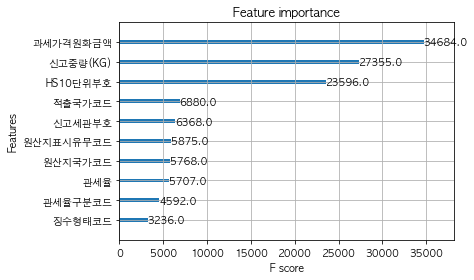

In [48]:
from xgboost import plot_importance

plot_importance(xgb_c)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

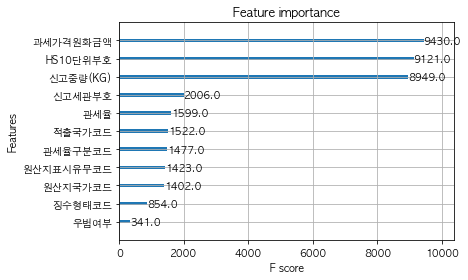

In [49]:
plot_importance(xgb_k)

In [50]:
# for var in ['신고중량(KG)', '과세가격원화금액']:
#     df_test[var] = df_test[var].apply(lambda x: np.log1p(x))
    
# df_test_encode = df_test.drop(['관세율', '신고중량(KG)', '과세가격원화금액'], axis=1)

# # encoder = LabelEncoder()

# # df_test_encode.loc[:,:].apply(encoder.fit_transform)
# df_test_encode.loc[:,:] = \
# df_test_encode.loc[:,:].apply(encoder.fit_transform)

# df_test_label = pd.concat([df_test_encode, df_test.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액']]], axis=1)

In [51]:
# df_test_label

In [52]:
# df_test_label.info()

In [53]:
xgb_test_c_pred = xgb_c.predict(df_test_label)
collections.Counter(xgb_test_c_pred)

Counter({0: 6720, 1: 1414})

In [54]:
df_test_label['우범여부'] = xgb_test_c_pred

In [55]:
df_test_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부
0,13,2,2127,15,19,18,1,7.2,6.804836,12.936260,0
1,6,2,766,36,19,18,1,0.0,5.993961,10.326170,0
2,9,5,1799,15,19,18,4,3.2,5.828946,7.867603,0
3,6,2,1687,15,19,0,1,13.0,3.433987,7.815611,0
4,4,2,3217,94,109,5,0,1.3,1.386294,11.363569,0
...,...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1137,15,19,18,4,4.8,6.836259,10.921179,0
8130,9,2,925,49,55,1,4,6.5,8.599879,10.248388,0
8131,6,2,3145,46,55,0,2,8.0,4.548600,8.456179,0
8132,13,6,1636,63,73,10,1,0.0,6.576470,12.193305,0


In [56]:
xgb_test_k_pred = xgb_k.predict(df_test_label)
collections.Counter(xgb_test_k_pred)

Counter({0: 6720, 1: 1371, 2: 43})

In [57]:
df_test_label['핵심적발'] = xgb_test_k_pred

In [58]:
df_test_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,13,2,2127,15,19,18,1,7.2,6.804836,12.936260,0,0
1,6,2,766,36,19,18,1,0.0,5.993961,10.326170,0,0
2,9,5,1799,15,19,18,4,3.2,5.828946,7.867603,0,0
3,6,2,1687,15,19,0,1,13.0,3.433987,7.815611,0,0
4,4,2,3217,94,109,5,0,1.3,1.386294,11.363569,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1137,15,19,18,4,4.8,6.836259,10.921179,0,0
8130,9,2,925,49,55,1,4,6.5,8.599879,10.248388,0,0
8131,6,2,3145,46,55,0,2,8.0,4.548600,8.456179,0,0
8132,13,6,1636,63,73,10,1,0.0,6.576470,12.193305,0,0


In [59]:
result['우범여부'] = xgb_test_c_pred
result['핵심적발'] = xgb_test_k_pred
result

,신고번호,우범여부,핵심적발
0,56839011,0,0
1,64859691,0,0
2,99950077,0,0
3,22601387,0,0
4,33240058,0,0
...,...,...,...
8129,95650431,0,0
8130,48093440,0,0
8131,12889495,0,0
8132,39908806,0,0


In [61]:
result.to_csv('비둘기.csv')